<a href="https://colab.research.google.com/github/s-r-aman/machine_learning_playground/blob/master/wine_snob.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install fastai==0.7

In [0]:
import pandas as pd
from fastai.imports import *
from fastai.structured import *
from sklearn.ensemble import RandomForestRegressor
# from Ipython.diplay import display

In [0]:
URL = 'http://mlr.cs.umass.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'

In [0]:
df_raw = pd.read_csv(URL, sep=';')

In [29]:
df_raw.head().T

,0,1,2,3,4
fixed acidity,7.4000,7.8000,7.800,11.200,7.4000
volatile acidity,0.7000,0.8800,0.760,0.280,0.7000
citric acid,0.0000,0.0000,0.040,0.560,0.0000
residual sugar,1.9000,2.6000,2.300,1.900,1.9000
chlorides,0.0760,0.0980,0.092,0.075,0.0760
free sulfur dioxide,11.0000,25.0000,15.000,17.000,11.0000
total sulfur dioxide,34.0000,67.0000,54.000,60.000,34.0000
density,0.9978,0.9968,0.997,0.998,0.9978
pH,3.5100,3.2000,3.260,3.160,3.5100
sulphates,0.5600,0.6800,0.650,0.580,0.5600


In [11]:
df_raw.shape

(1599, 12)

In [0]:
?? proc_df

In [0]:
df, y, nas = proc_df(df_raw, 'quality')

In [30]:
df.head().T

,0,1,2,3,4
fixed acidity,7.4000,7.8000,7.800,11.200,7.4000
volatile acidity,0.7000,0.8800,0.760,0.280,0.7000
citric acid,0.0000,0.0000,0.040,0.560,0.0000
residual sugar,1.9000,2.6000,2.300,1.900,1.9000
chlorides,0.0760,0.0980,0.092,0.075,0.0760
free sulfur dioxide,11.0000,25.0000,15.000,17.000,11.0000
total sulfur dioxide,34.0000,67.0000,54.000,60.000,34.0000
density,0.9978,0.9968,0.997,0.998,0.9978
pH,3.5100,3.2000,3.260,3.160,3.5100
sulphates,0.5600,0.6800,0.650,0.580,0.5600


In [16]:
y

array([5, 5, 5, ..., 6, 5, 6])

In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [0]:
def split_vals(df, n): return df[:n].copy(), df[n:].copy()

In [34]:
n_trn = int(len(df) - len(df)/5); n_trn

1279

In [0]:
x_trn, x_valid = split_vals(df, n_trn)
y_trn, y_valid = split_vals(y, n_trn)

In [0]:
def rmse(y1, y): return math.sqrt(((y1 - y)**2).mean())

def print_score(m):
  res = [
      rmse(m.predict(x_trn), y_trn),
      rmse(m.predict(x_valid), y_valid),
      m.score(x_trn, y_trn),
      m.score(x_valid, y_valid)
  ]
  if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
  print(res)

In [40]:
m = RandomForestRegressor(n_jobs=-1)
m.fit(x_trn, y_trn)
print_score(m)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.2587030864580555, 0.6937218462755804, 0.8985101302245557, 0.2053663570691434]


In [47]:
m = RandomForestRegressor(n_jobs=-1, n_estimators=40, oob_score=True)
m.fit(x_trn, y_trn)
print_score(m)

[0.21662142929044267, 0.6633544018848446, 0.9288422333168328, 0.27341331269349833, 0.49654715335420996]


In [0]:
??set_rf_samples

In [0]:
set_rf_samples(500)

In [53]:
m = RandomForestRegressor(n_jobs=-1, n_estimators=40, oob_score=True)
m.fit(x_trn, y_trn)
print_score(m)

[0.40751348447784447, 0.6626680211463355, 0.74817233247308, 0.27491615067079433, 0.4660394607255266]


In [54]:
m = RandomForestRegressor(n_jobs=-1, n_estimators=40, oob_score=True, min_samples_leaf=3)
m.fit(x_trn, y_trn)
print_score(m)

[0.46382588715171, 0.653955953835366, 0.6737658333903374, 0.29385611631500785, 0.4471721691562981]


In [55]:
m = RandomForestRegressor(n_jobs=-1, n_estimators=40, oob_score=True, min_samples_leaf=4)
m.fit(x_trn, y_trn)
print_score(m)

[0.48226864724724533, 0.6501758537558641, 0.6473064374240912, 0.30199605233078775, 0.45197829471695816]


In [56]:
m = RandomForestRegressor(n_jobs=-1, n_estimators=40, oob_score=True, min_samples_leaf=5)
m.fit(x_trn, y_trn)
print_score(m)

[0.501742376426199, 0.6518322345579847, 0.6182482470436166, 0.2984350678904346, 0.44152507430477217]


In [63]:
m = RandomForestRegressor(n_jobs=-1, n_estimators=40, oob_score=True, min_samples_leaf=1)
m.fit(x_trn, y_trn)
print_score(m)

[0.406595112628965, 0.6613182266314759, 0.749306090510145, 0.2778670020639834, 0.45966436759855034]


In [0]:
reset_rf_samples()

In [65]:
m = RandomForestRegressor(n_jobs=-1, n_estimators=40, oob_score=True, min_samples_leaf=1)
m.fit(x_trn, y_trn)
print_score(m)

[0.21539869754804658, 0.6683132335402314, 0.929643274126027, 0.2625096749226007, 0.48730028616028587]


In [66]:
m = RandomForestRegressor(n_jobs=-1, n_estimators=40, oob_score=True, min_samples_leaf=2)
m.fit(x_trn, y_trn)
print_score(m)

[0.2793797540109087, 0.6689520276570045, 0.8816388063450254, 0.2610991697726849, 0.474553330631602]


In [67]:
m = RandomForestRegressor(n_jobs=-1, n_estimators=40, oob_score=True, min_samples_leaf=3)
m.fit(x_trn, y_trn)
print_score(m)

[0.33131509366840733, 0.6583980872609991, 0.833543055703606, 0.28423027234849574, 0.48018176512426847]


In [69]:
m = RandomForestRegressor(
      n_jobs=-1,
      n_estimators=40,
      oob_score=True,
      min_samples_leaf=1
)
m.fit(x_trn, y_trn)
print_score(m)

[0.21720715549259723, 0.6611217975910338, 0.9284569037878956, 0.278295923632611, 0.4856097218672145]


In [70]:
m = RandomForestRegressor(n_jobs=-1, n_estimators=40, oob_score=True, min_samples_leaf=1, max_features=0.6)
m.fit(x_trn, y_trn)
print_score(m)

[0.21769143795274973, 0.6658127669435304, 0.9281375248898728, 0.2680179308565531, 0.4942107926634658]


In [72]:
fi = rf_feat_importance(m, df); fi[:10]

,cols,imp
10,alcohol,0.268934
1,volatile acidity,0.133388
9,sulphates,0.127436
6,total sulfur dioxide,0.076673
7,density,0.073174
8,pH,0.058368
3,residual sugar,0.055540
0,fixed acidity,0.055326
4,chlorides,0.054143
2,citric acid,0.052525


In [0]:
def plot_fi(fi): return fi.plot('cols', 'imp', 'barh', figsize=(12, 7), legend=False)

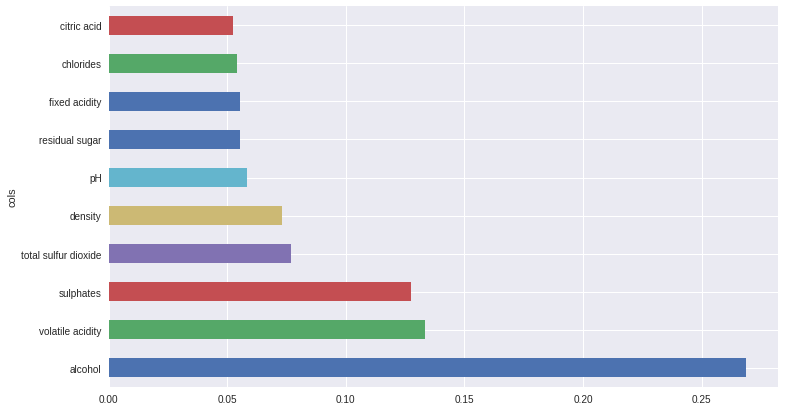

In [77]:
plot_fi(fi[:10])

In [78]:
len(df.columns)

11

In [103]:
to_keep = fi[fi.imp > 0.05].cols; len(to_keep)

10

In [81]:
to_keep = fi[fi.imp > 0.057].cols; len(to_keep)

6

In [0]:
df_keep = df_raw[to_keep].copy()

In [86]:
df_keep.head().T

,0,1,2,3,4
alcohol,9.4000,9.8000,9.800,9.800,9.4000
volatile acidity,0.7000,0.8800,0.760,0.280,0.7000
sulphates,0.5600,0.6800,0.650,0.580,0.5600
total sulfur dioxide,34.0000,67.0000,54.000,60.000,34.0000
density,0.9978,0.9968,0.997,0.998,0.9978
pH,3.5100,3.2000,3.260,3.160,3.5100


In [88]:
x_trn, x_valid = split_vals(df_keep, n_trn)
m = RandomForestRegressor(n_jobs=-1, n_estimators=40, oob_score=True, min_samples_leaf=1, max_features=0.6)
m.fit(x_trn, y_trn)
print_score(m)

[0.21554384187839057, 0.657715625289532, 0.9295484237804426, 0.2857133642930856, 0.4776832148772292]


In [92]:
m = RandomForestRegressor(n_jobs=-1, n_estimators=40, oob_score=True, min_samples_leaf=1, max_features=0.6)
m.fit(x_trn, y_trn)
print_score(m)

[0.22992609377899914, 0.6695599651076818, 0.9198329325229524, 0.2597555469556243, 0.45315750627857654]


In [98]:
m = RandomForestRegressor(n_jobs=-1, n_estimators=45, oob_score=True, min_samples_leaf=1, max_features=0.6)
m.fit(x_trn, y_trn)
print_score(m)

[0.21476408273211944, 0.6834699502095949, 0.9300572380667775, 0.22867917797398365, 0.484047777749663]


In [100]:
m = RandomForestRegressor(n_jobs=-1, n_estimators=100, oob_score=True, min_samples_leaf=1, max_features=0.6)
m.fit(x_trn, y_trn)
print_score(m)

[0.21128354159559862, 0.6706433478384767, 0.9323059011709828, 0.25735810113519086, 0.4988014794615705]


In [0]:
x_trn, x_valid = split_vals(df, n_trn)

In [102]:
m = RandomForestRegressor(n_jobs=-1, n_estimators=100, oob_score=True, min_samples_leaf=1, max_features=0.6)
m.fit(x_trn, y_trn)
print_score(m)

[0.20990429331817176, 0.6566467848090022, 0.9331868237555989, 0.2880330237358101, 0.5170074492045845]


In [0]:
x_trn, x_valid = split_vals(df_keep, n_trn)

In [108]:
m = RandomForestRegressor(n_jobs=-1, n_estimators=100, oob_score=True, min_samples_leaf=1, max_features=0.6)
m.fit(x_trn, y_trn)
print_score(m)

[0.20994340054120614, 0.6522154551986636, 0.9331619255398831, 0.297609907120743, 0.5171084084504698]


In [0]:
import pickle
from sklearn.externals import joblib

In [0]:
!wget https://github.com/s-r-aman/wine_quality_predictor/blob/master/rf_regressor.pkl

m_prev = joblib.load('rf_regressor.pkl')

In [114]:
??joblib

Object `joblib` not found.
